<a href="https://colab.research.google.com/github/aaaraafaat/ML--Learning_Base/blob/main/Single_layer_perceptron_using_sklearn_for_binary_classification_on_the_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [2]:
print("Starting Perceptron Classification on Iris (Two Features)...")

# --- 1. Load and Prepare the Data (Iris Dataset) ---
# Load the full dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names) # Features (measurements)
y = pd.Series(iris.target) # Target (flower species: 0, 1, 2)

Starting Perceptron Classification on Iris (Two Features)...


In [5]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [8]:
# --- 2. Focus on Binary Classification (Iris Setosa vs. Iris Versicolor) ---
# We only want to classify between species 0 (setosa) and 1 (versicolor).
# Species 2 (virginica) is ignored.

# Find indices where the species is 0 or 1
binary_indices = y[y <= 1].index

In [9]:
# Select only the data points for these two species
X_binary = X.loc[binary_indices]
y_binary = y.loc[binary_indices]

In [10]:
# Select ONLY TWO features for easier visualization later:
# We'll use 'sepal length (cm)' and 'petal length (cm)'
feature_names = ['sepal length (cm)', 'petal length (cm)']
X_final = X_binary[feature_names]

In [11]:
# Quick Check (Example for a simple brain):
# X_final now has 100 rows (50 setosa, 50 versicolor) and 2 columns (features).
print(f"\nData Shape (100 samples, 2 features): {X_final.shape}")



Data Shape (100 samples, 2 features): (100, 2)


In [13]:
# --- 3. Split Data into Training and Test Sets ---
# This is like dividing your study material (Train) from your exam questions (Test).
# We'll use 80% for training and 20% for testing (test_size=0.2).
# random_state ensures you get the same split every time you run the code.
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_binary, test_size=0.2, random_state=42
)

In [14]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 80 samples
Test set size: 20 samples


In [15]:
# --- 4. Train a Perceptron Model ---
# The Perceptron is the simplest type of artificial neural network.
# It learns a line (decision boundary) to separate the two classes (0 and 1).

# 4a. Initialize the Perceptron model
# Perceptron() uses a simple algorithm to find the separating line.
# max_iter=1000 and tol=1e-3 are standard settings for convergence.
# random_state=42 makes the initialization consistent.
model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

In [16]:
# 4b. Train the model (The "Learning" part)
# .fit() teaches the model by showing it the training features (X_train) and their correct labels (y_train).
model.fit(X_train, y_train)

Perceptron(random_state=42)

In [17]:
# --- 5. Evaluate the Model (Print Accuracies) ---

# 5a. Predictions on the training set (How well did it learn the 'study material'?)
y_train_pred = model.predict(X_train)
# 5b. Predictions on the test set (How well can it answer 'exam questions' it hasn't seen?)
y_test_pred = model.predict(X_test)

In [18]:
# Calculate Accuracy: (Correct Predictions / Total Predictions)
training_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\n--- Model Performance ---")
print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Test Accuracy:     {test_accuracy:.4f}")


--- Model Performance ---
Training Accuracy: 1.0000
Test Accuracy:     1.0000


In [19]:
# --- 6. Plot the Decision Boundary (Optional but helpful!) ---
# This visualizes the line the Perceptron learned to separate the two flower classes.

# Create a mesh grid (a canvas) of points to cover the entire feature space
x_min, x_max = X_final.iloc[:, 0].min() - 0.5, X_final.iloc[:, 0].max() + 0.5
y_min, y_max = X_final.iloc[:, 1].min() - 0.5, X_final.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for every point on the canvas
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


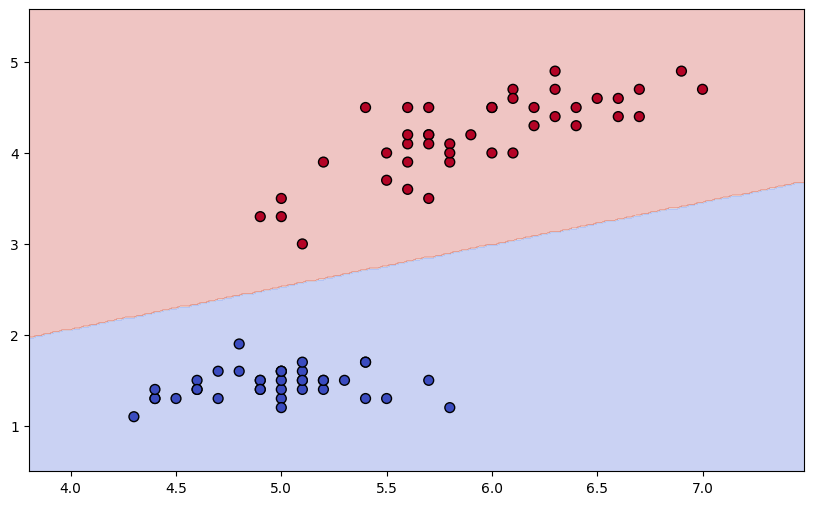

In [20]:
# Plot the colored regions and the training points
plt.figure(figsize=(10, 6))

# Plot the decision regions (colored background)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the training points
# 'c=y_train' colors the points based on their actual class (0 or 1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train,
            cmap=plt.cm.coolwarm, edgecolor='k', s=50, label='Training Data')

/tmp/ipython-input-3927964033.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


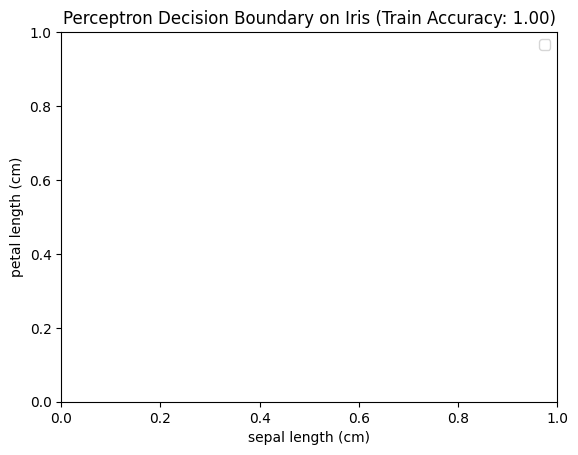


Task complete!


In [21]:
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title(f'Perceptron Decision Boundary on Iris (Train Accuracy: {training_accuracy:.2f})')
plt.legend()
plt.show()

print("\nTask complete!")